<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/GAN_Smile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 웃는 얼굴 만들기
## Dataset은 아래 주소 Smiling or Not | Face Data 에서 퍼었음.
### https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data

from google.colab import drive 
drive.mount('/content/drive/')


Mounted at /content/drive/


In [6]:
pwd

'/content'

In [7]:
cd drive/MyDrive/smile

/content/drive/MyDrive/smile


Text(0.5, 1.0, 'Simle')

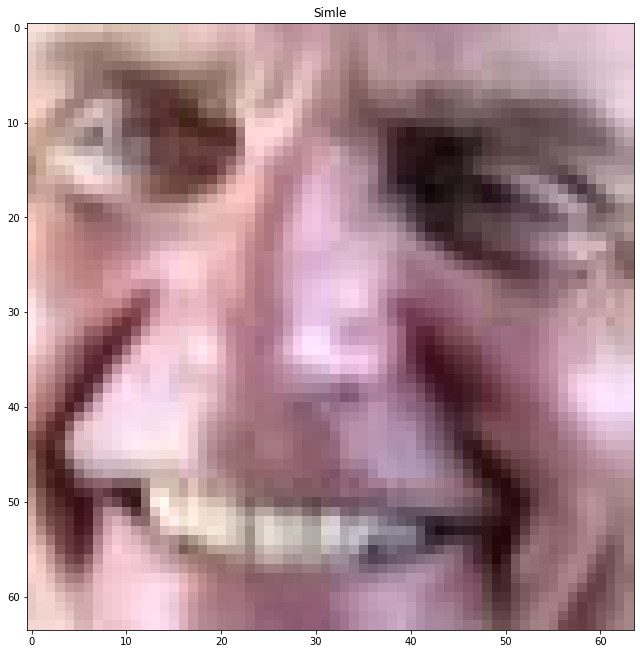

In [9]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Simle')

In [10]:
image_sample.shape

(64, 64, 3)

In [19]:
pwd


'/content/drive/MyDrive/smile'

In [24]:
cd ..

/content/drive/MyDrive


In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(directory='smile',
                                              target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=1)
                                             # shuffle=True)
len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째



Found 600 images belonging to 1 classes.


array([[[0.34117648, 0.27450982, 0.16470589],
        [0.34901962, 0.28235295, 0.17254902],
        [0.35686275, 0.2784314 , 0.18039216],
        ...,
        [0.8117648 , 0.69803923, 0.68235296],
        [0.69411767, 0.5803922 , 0.5647059 ],
        [0.53333336, 0.41960788, 0.4039216 ]],

       [[0.34117648, 0.27450982, 0.17254902],
        [0.3372549 , 0.27058825, 0.16862746],
        [0.34117648, 0.2627451 , 0.16862746],
        ...,
        [0.8078432 , 0.69411767, 0.6784314 ],
        [0.69803923, 0.58431375, 0.5686275 ],
        [0.5411765 , 0.427451  , 0.41176474]],

       [[0.3372549 , 0.26666668, 0.17254902],
        [0.33333334, 0.25490198, 0.16078432],
        [0.31764707, 0.2392157 , 0.14509805],
        ...,
        [0.80392164, 0.6901961 , 0.6666667 ],
        [0.7058824 , 0.5921569 , 0.5686275 ],
        [0.56078434, 0.44705886, 0.42352945]],

       ...,

       [[0.6039216 , 0.50980395, 0.4156863 ],
        [0.6156863 , 0.52156866, 0.427451  ],
        [0.5803922 , 0

In [83]:
train[0][0][0].shape

(64, 64, 3)

In [93]:
train[0][0].shape

(1, 64, 64, 3)

In [94]:
type(train[0][0])

numpy.ndarray

In [92]:
ABC = np.array(train[0][0])

BCD = np.append(ABC, train[1][0], axis =0 )

BCD.shape

(2, 64, 64, 3)

In [115]:
X_train = np.array(train[0][0])

for i in range(1,600):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape


(600, 64, 64, 3)

4/4 [==============================] - 0s 7ms/step
100 [D loss: 0.676148, acc.: 51.56%] [G loss: 0.649459]
4/4 [==============================] - 0s 7ms/step
200 [D loss: 0.313483, acc.: 91.80%] [G loss: 1.788825]
4/4 [==============================] - 0s 8ms/step
300 [D loss: 0.157365, acc.: 98.44%] [G loss: 2.294426]
4/4 [==============================] - 0s 7ms/step
400 [D loss: 0.353577, acc.: 87.11%] [G loss: 1.683682]
4/4 [==============================] - 0s 7ms/step
500 [D loss: 0.132443, acc.: 99.61%] [G loss: 2.229107]
4/4 [==============================] - 0s 8ms/step
600 [D loss: 2.523956, acc.: 35.16%] [G loss: 0.936768]
4/4 [==============================] - 0s 8ms/step
700 [D loss: 0.493488, acc.: 75.00%] [G loss: 1.745618]
4/4 [==============================] - 0s 9ms/step
800 [D loss: 0.669457, acc.: 76.17%] [G loss: 3.110444]
4/4 [==============================] - 0s 10ms/step
900 [D loss: 0.445859, acc.: 90.62%] [G loss: 1.289398]
4/4 [==============================]

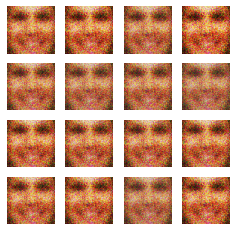

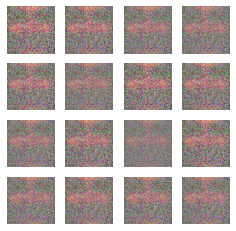

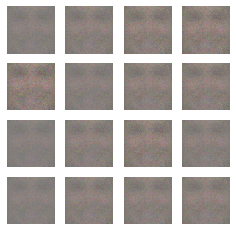

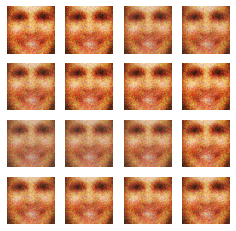

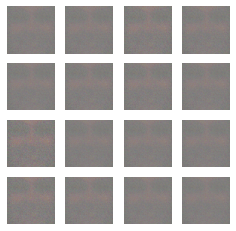

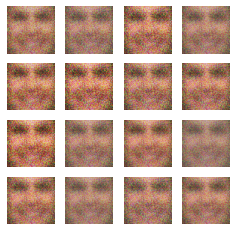

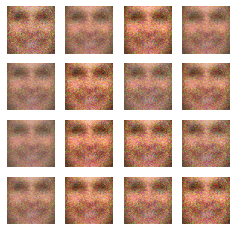

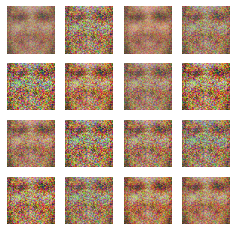

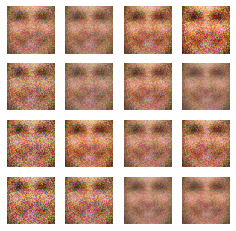

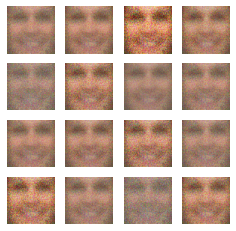

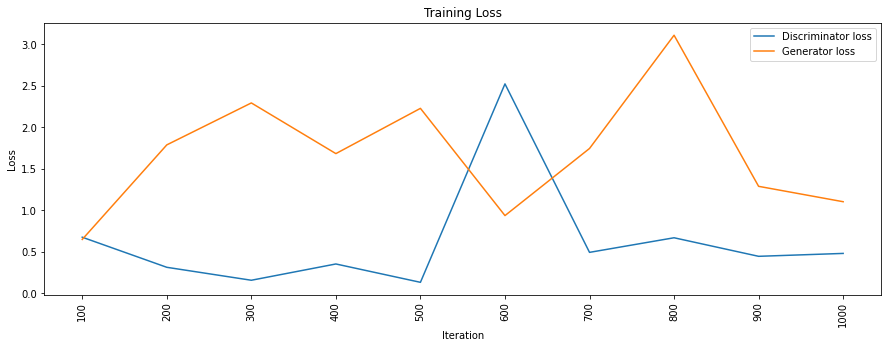

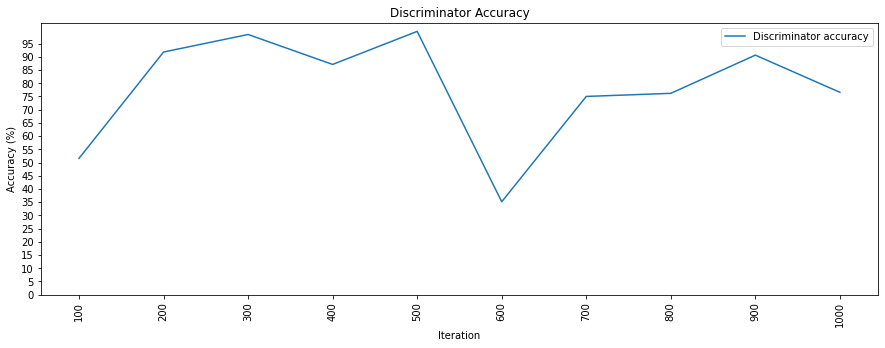

In [117]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):
    
    X_train = X_train2 
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 1000
batch_size = 128
sample_interval = 100

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
